# Supplemental notes, getting started

We'll be using the same tools that we used last week for this session.

- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization
- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

Shortly we'll also by trying out:
- [statsmodel](statsmodel.org) - this is another library for doing statistical fitting.  It generates R-like reports.
- We'll also being trying out two new parts of scikit-learn sklearn.cross_decomposition and decomposition for PLS and PCA 

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

As before, the aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

Topics that we'll be discussing in this session include:
Robust Regression - http://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors


## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

# Exercise:  Apply statsmodel to the synthetic drilling hole data

Statsmodel has an API with similarities to scikit-learn, but uses statistical language (particularly as used in financial and economic models) rather than the terminology that is more common in machine learning.  Statsmodel refers to endogeneous and exogeneous variables.  In many ways they reflect the differences in philosophy between how people with a statistics modelling background work, vs people with machine learning/computing backgrounds.  Scikit-learn has a focus on training and validation error curves and cross-validation to choose a model, whereas statsmodel provides metrics for hypothesis tests and goodness-of-fit.

We'll briefly look at a typical report that statsmodel generates after fitting.

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from regression_help import create_composition_dataframe, create_observations, create_templates_matrix

templates = create_templates_matrix()
compositions = create_composition_dataframe(150)
observations = create_observations(compositions, templates)

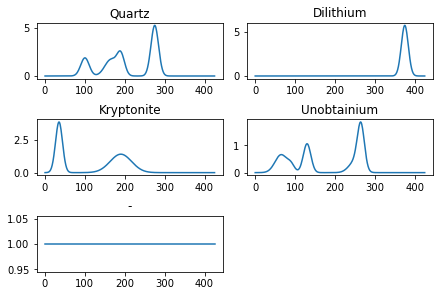

In [2]:
template_names = list(compositions.keys()) + ['-']
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True)
for j in range(3):
    for i in range(2):
        if j*2 + i < 5:
            axs[j, i].plot(templates[:, j*2 + i])
            axs[j, i].set_title(template_names[j*2 + i])
        else:
            axs[j, i].axis('off')
plt.show()

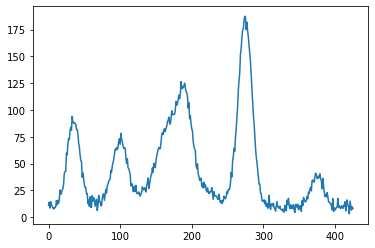

In [3]:
plt.plot(observations[:, 3])

In [4]:
X = templates
y = observations[:, 3]
model = sm.OLS(y, X).fit()

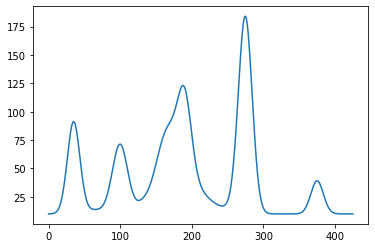

In [5]:
plt.plot(model.predict(templates))

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:57:16   Log-Likelihood:                -1076.3
No. Observations:                 426   AIC:                             2163.
Df Residuals:                     421   BIC:                             2183.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            32.2090      0.140    229.631      0.000      31.933      32.485
x2             5.1258      0.147     34.938      0.000       4.837       5.414
x3            20.8791      0.200    104.476      0.000      20.486      21.272
x4             5.2099      0.408     12.760      0.000       4.407       6.012
const          9.8854      0.225     43.994      0.000       9.444      10.327
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.847
Skew:                           0.152   Prob(JB):                        0.397
Kurtosis:                       2.892   Cond. No.                         4.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's compare this against ground truth:

In [7]:
compositions.loc[3]

Quartz         32.249339
Dilithium       5.000000
Kryptonite     20.669148
Unobtainium     5.241627
Name: 3, dtype: float64

# Exercise:  Apply PCA to the synthetic drilling hole data

We have just worked through the theory behind principal components analysis.  Let's see how we can use it in scikit-learn.  We have also seen how our drilling data problem has many correlated variables, which we have good reason to expect have a lower-dimensional structure.

## Look at the correlation matrix

Lets look at the correlation matrix for the original instrument-observed features.  As you've seen, the feature variables are highly correlated with each other.  In real-world situations, if we wanted to use linear least squares to find the underlying templates, this can cause linear least squares to fail.  Particularly as we will often have fewer observations than there are unknown variables (426).  

Seaborn's heatmap is useful for showing these correlations visually, but it can be very slow.  Matplotlib's matshow is faster, try Matplotlib if heatmap doesn't work well on your machine.

<AxesSubplot:>

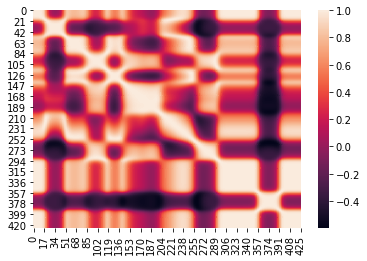

In [8]:
import seaborn as sns
correlation_matrix = np.corrcoef(X)
sns.heatmap(correlation_matrix)

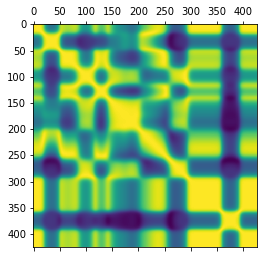

In [9]:
plt.matshow(correlation_matrix)

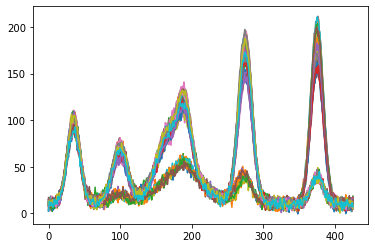

In [10]:
# Let's plot all of the observations over each other.
fig, ax = plt.subplots(1,1)
for observation_idx in range(0, 50):
    plt.plot(observations[:,observation_idx])

This quick exploratory plot immediately tells us there is lots of structure in this dataset.  There are clearly at least two kinds of sample here.

## Apply PCA to observations matrix

Go look at scikit-learn's documentation to check what is the module for PCA and apply it on the observations using 15 components. You'll see that the PCA follows the same API we've used for linear regression, with a model instantiation followed by a call of the fit function.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(observations)

PCA(n_components=15)

Let's have a look at the components

In [12]:
print(pca.components_)
print(len(pca.components_[0]))

[[ 0.04356831  0.04520601  0.04528044 ...  0.08901929  0.08586165
   0.09311507]
 [ 0.13984711  0.14767581  0.1405693  ...  0.06601695  0.05486511
  -0.06210631]
 [ 0.02723401  0.09429123  0.08752391 ... -0.06421981 -0.13409257
   0.0569549 ]
 ...
 [-0.08070938 -0.17482224  0.00932622 ...  0.07483724 -0.01565382
   0.11984867]
 [-0.10943742 -0.03858328 -0.0029298  ... -0.04221628  0.04408887
  -0.0302168 ]
 [-0.02508695 -0.09528954 -0.14089967 ... -0.01270631 -0.09654014
  -0.02528253]]
150


Oops!  Can you see what's wrong here?  The components should have the same length as the orginal observations.  These components have only 150 elements.  This means that the observations array isn't organised properly for PCA fitting.  It thinks that we have ~400 observations, each with 150 features.  To fix this we should transpose the matrix.

It's always good to look at the dimensions of our arrays to ensure we're not making trivial but annoying mistakes like this.

In [13]:
transposed_observations = observations.transpose()

Let's fit the PCA again on the transposed observations and look at the number of features in a component again.

In [14]:
pca.fit(transposed_observations)

PCA(n_components=15)

In [15]:
print(pca.components_)
print(len(pca.components_[0]))

[[-7.95752630e-05  1.15480701e-03 -1.35470001e-04 ... -7.56697968e-04
  -8.50461195e-04 -3.34196137e-05]
 [-3.22180889e-04  2.35741684e-03  7.17588005e-04 ... -8.86002870e-04
  -2.03353853e-03  1.06993476e-03]
 [-3.02395611e-02 -1.74387375e-02  2.97430292e-03 ... -5.90892449e-03
   6.00658755e-03 -9.68365552e-04]
 ...
 [-4.70970093e-02  3.45764162e-02 -2.12131719e-02 ...  2.17921936e-02
   7.67427077e-02  2.06457329e-02]
 [ 6.86285441e-02  7.33639198e-02 -8.61568685e-02 ... -2.41370131e-02
   9.38845386e-02  1.96044393e-02]
 [ 4.46817045e-02  1.76867243e-02 -7.58607241e-02 ...  3.38424106e-02
  -3.19747510e-02  2.91489868e-02]]
426


That's better!  We clearly have many more elements in these component arrays now.

Let's look at the explained variance, as discussed in the Powerpoints.  Intuitively, this sounds like what you want.  Some documentation on the web also suggests that this is what we want. But Python is a living project and this now returns abstract quantities ("eigenvalues") that are related to the variances, but are not variances.

In [16]:
print(pca.explained_variance_)

[1.49915904e+05 1.95026389e+04 6.52704416e+02 2.91394654e+02
 6.16815861e+01 6.10477931e+01 5.94336048e+01 5.89614065e+01
 5.69626368e+01 5.65918066e+01 5.52750611e+01 5.41998092e+01
 5.37586523e+01 5.23159846e+01 5.16336001e+01]


Nowadays, we should use explained_variance_ratio, like this:

In [17]:
print (pca.explained_variance_ratio_)

[8.61229387e-01 1.12037784e-01 3.74962368e-03 1.67398943e-03
 3.54345290e-04 3.50704308e-04 3.41431200e-04 3.38718538e-04
 3.27236106e-04 3.25105780e-04 3.17541406e-04 3.11364353e-04
 3.08830016e-04 3.00542251e-04 2.96622123e-04]


This says that the first component was able to account for about 86% of the variation, and the two following components account for about 1% and then less than 1% each.

PCA has compressed 87% of the variation in ~400 features into just two transformed features!

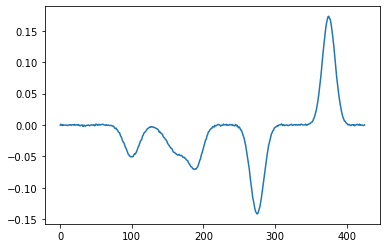

In [18]:
# What do these principal components look like?
plt.plot(pca.components_[0])

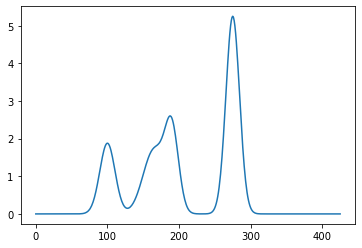

In [19]:
# How does this compare to our quartz template?  Remember,
# with PCA we've only seen the observations.  The PCA transform
# didn't know what the templates were beforehand.
plt.plot(templates[:, 0])

As you can see, the principal components may not find the original templates, but what it does find are patterns that can help distinguish the templates from each other.  Notice how the first three peaks do seem to relate to the first three in the template, though inverted (mathematically, this doesn't matter).  Interestingly there is a fourth peak present.  This is likely because that fourth peak is important for distinguishing quartz from another phase that otherwise looks similar.  Note it has opposite sign to the first three peaks.  It can be very hard (and it's often academic) to interpret qualitatively what the meaning in the components is.  But in this case it does have a clear relevance. 

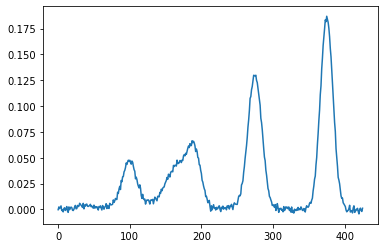

In [20]:
# Dilithium?
plt.plot(pca.components_[1])

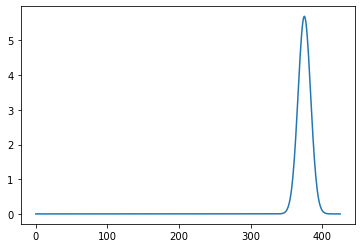

In [21]:
# The dilithium template
plt.plot(templates[:, 1])

This is interesting.  In the mixtures dilithium and quartz often appear together.  The principal component has a fourth peak that is sensitive to the dilithium peak.  The quartz peak was inverted as it was trying to filter it out.

Note: During the initial presentation I hadn't looked at it closely enough and thought that the peak was offset a bit.  This happens sometimes with principal components when there are interferences, and the principal component becomes sensitive to a leading or falling edge.  But it doesn't seem to be happening in this particular instance.

Let's plot them over each other to be sure -

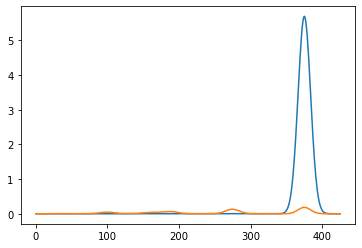

In [22]:
plt.plot(templates[:, 1])
plt.plot(pca.components_[1])

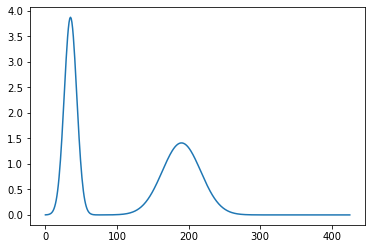

In [23]:
# And the third, kryptonite phase,
# followed by the third principal component
plt.plot(templates[:, 2])

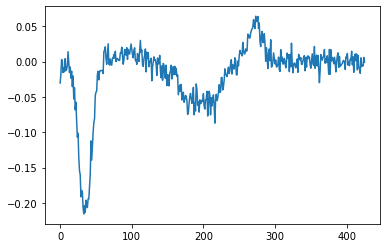

In [24]:
plt.plot(pca.components_[2])

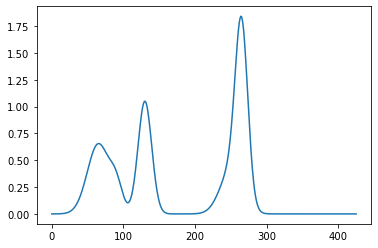

In [25]:
# And the unobtainium phase, followed by the fourth component
plt.plot(templates[:, 3])

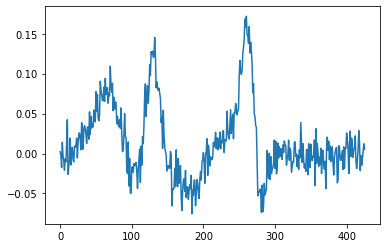

In [26]:
plt.plot(pca.components_[3])

This looks better than I expected, for unobtainium.  But there's a good chance that PCA regression will struggle to predict unobtainium well, especially when there isn't very much present.

We can plot explained variance like this:

Text(0, 0.5, 'cumulative explained variance')

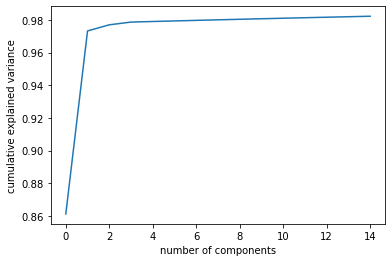

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We seem to hit a sweet spot at about 2 components, and then explained variance only gradually improves after this point.  This is a good result, given that we know that we know these samples only contain four minerals, and all other variance is from noise.

How do we look at the transformed data?  We use the transform method to find the "scores" associated with each observation.  These are new observations in the new feature space that PCA has found.  Each element in observations_in_pc_space has 15 elements in it, being the reduced feature space.  So we have a new feature space of 15 dimensions, when we used to have 426.

In [28]:
observations_in_pc_space = pca.transform(transposed_observations)

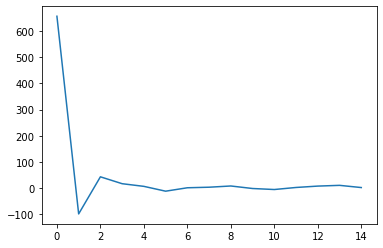

In [29]:
# Here's the first observation in the PC feature space.
plt.plot(observations_in_pc_space[0])

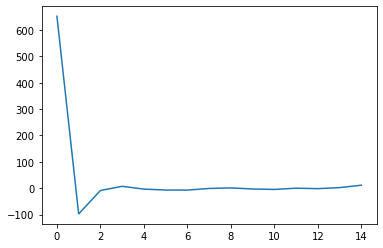

In [30]:
# Here's the third observation
plt.plot(observations_in_pc_space[2])

The point of all of this is to reduce the dimensionality so that we can better see the underlying structure.

We'd like to be able to plot the "scores" against each other, and look for patterns.

That's hard in 15 dimensions, but as we've seen, we can explain most of the variance in only a couple of dimensions.  Let's plot PC1 against PC2 for all observations.

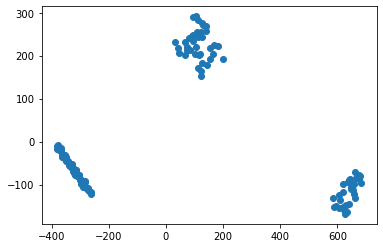

In [31]:
plt.scatter(observations_in_pc_space[:, 0], observations_in_pc_space[:, 1])

Oh look!  There are clusters!

This tells us that there are three distinct groupings of our samples in the set of 150.  This is based only on the first couple of principal components.

What about PC2 and PC3?  Are there any clusters there?

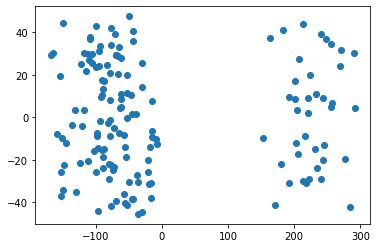

In [32]:
plt.scatter(observations_in_pc_space[:, 1], observations_in_pc_space[:, 2])

# Exercise:  Look at the Octane dataset

Try to study the Octane dataset in the same manner!  You'll need pandas to read the dataset octane.csv from the data folder. You'll need to disregard the columns with the sample names and the octane ratings, as we're only interested in the spectra.

In [33]:
import pandas as pd

# Open templates from disk, drop the sample names and octane numbers and the
# octane observations.
octane_dataframe = pd.read_csv('../data/octane.csv')
octane_dataframe = octane_dataframe.drop(columns=['Sample name', 'Octane number'])
observations = octane_dataframe.values

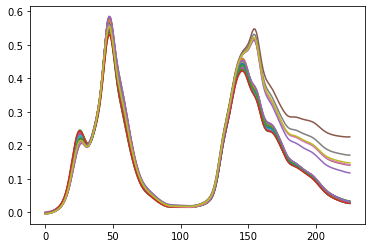

In [34]:
# Let's plot all of the observations over each other.
for i in range(observations.shape[0]):
    plt.plot(observations[i, :])

It's a bit hard to tell from this plot, but there may be a couple of clusters present in this data.

Let's look at the principal components. We don't need to transpose these observations, so this real life data is easier to use than the synthetic drillholes! First, create a PCA model, fit it to the observations, and print the explained variance ratios.

In [35]:
pca = PCA(n_components=15)
pca.fit(observations)
print(pca.explained_variance_ratio_)

[9.22872309e-01 6.08502766e-02 9.47588915e-03 5.17805846e-03
 7.56925839e-04 3.40445982e-04 2.59315489e-04 1.19149087e-04
 5.18900585e-05 2.79384226e-05 2.20245122e-05 1.76138002e-05
 9.14188067e-06 6.33190018e-06 4.50618473e-06]


Now let's plot the cumulative explained variance.

Text(0, 0.5, 'cumulative explained variance')

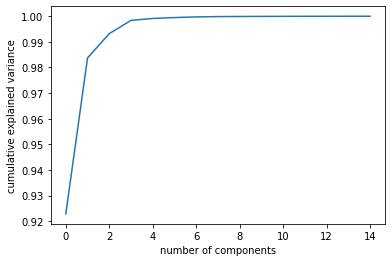

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In this dataset the first component is able to account for 92.3% of the variance in the dataset!  That's even better than with our synthetic drilling data.  It looks like we need about 4 components before there is little contribution from the remaining components.

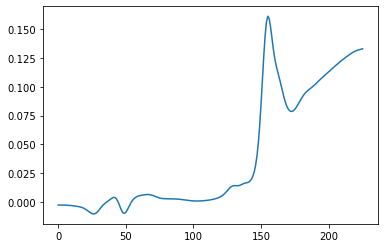

In [37]:
# Let's look at that first component
plt.plot(pca.components_[0])

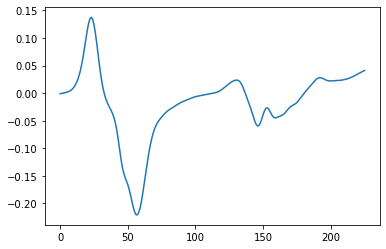

In [38]:
# And the second component
plt.plot(pca.components_[1])

Without domain knowledge in the industry, interpreting these shapes is hard, or impossible.  Fortunately, they're usually not what we're interested, and we've done PCA to help us see clusters, or as a transformation prior to applying a machine learning method (such as linear regression in the simplest case). Transform the observations to get their coordinates in the principal components' space.

In [39]:
observations_in_pc_space = pca.transform(observations)

Now use a scatterplot to visualize the first two components as we've done in the previous exercise.

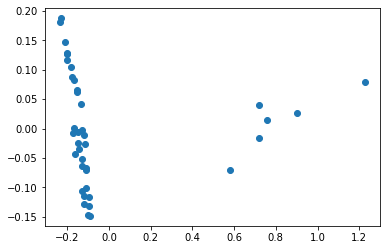

In [40]:
plt.scatter(observations_in_pc_space[:, 0], observations_in_pc_space[:, 1])

This is interesting!  It supports and makes more clear that there are likely to be two clusters here.  In this situation domain knowledge is helpful to understand what these two clusters could be.  If we know the row indices we can separate out the observations on the right.  Often just eyeballing (physically, in the plant, or at the instrument) the two groups of samples is enough to reveal why they're different and if the right group should be treated as outlier observations to be removed, or if they're important and central to the process variation being modelled.

Let's look at the second and third components.

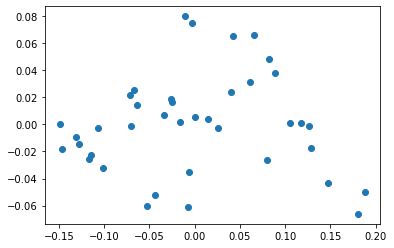

In [41]:
plt.scatter(observations_in_pc_space[:, 1], observations_in_pc_space[:, 2])

There is no obvious clustering between the second and third components. How about in the third and fourth components?

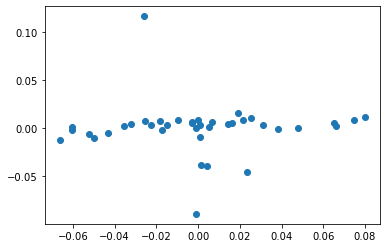

In [42]:
plt.scatter(observations_in_pc_space[:, 2], observations_in_pc_space[:, 3])

Yes, there is clustering in the third and fourth!

Let's find out which observations are not like the others here.  We can split them by looking at PC4, maybe choosing those that have score more that are less than -0.03 or greater than 0.03.

By looking at PC4, and if we had domain knowledge, we may have been able to deduce why these samples are different without further inspection.

In [43]:
PC4 = observations_in_pc_space[:,3]

In [44]:
# np.where returns a "tuple of arrays".  This code
# will extract the indices of the rows that fit the
# "where" criteria
PC4_big = np.where((PC4 > 0.03))[0]
PC4_small = np.where((PC4 < -0.03))[0]

Let's look at PC1 too.  The split is obvious at a score of 0.4 on that component

In [45]:
PC1 = observations_in_pc_space[:,0]

In [46]:
PC1_strange = np.where((PC1 > 0.4))[0]

Lets look at the observation rows that we've extracted.

In [47]:
PC1_strange

array([24, 25, 35, 36, 37, 38])

That means that our strange observations on PC1 have indices: 24, 25, 35, 36, 37 and 38

In [48]:
PC4_big

array([25])

In [49]:
PC4_small

array([24, 35, 36, 38])

That's interesting!  On the PC4 axis, our strange observations are:
24, 25, 35, 36 and 38.  37 is missing from this set.  But out of curiosity, did we almost get it?

In [50]:
PC4[37]

0.006865552544844383

Nope, it's just strange on PC1.  Let's plot these strange observations.

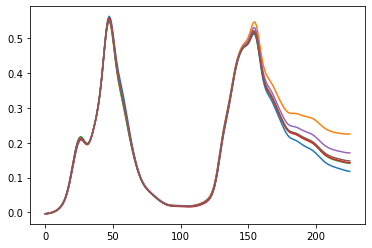

In [51]:
fig, ax = plt.subplots(1,1)
for strange_observations in PC1_strange:
    plt.plot(observations[strange_observations])

And the others:

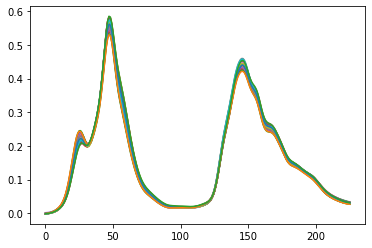

In [52]:
fig, ax = plt.subplots(1,1)
all_observations = np.arange(0, 39)
for normal_observations in np.setdiff1d(all_observations, PC1_strange):
    plt.plot(observations[normal_observations])

The strange nature of these is quite clear.  What do we do with them is a domain expert question.  Importantly, they really jump out when we look at them with PCA.  For argument's sake, lets call them outliers and say we want to remove them.  We can easily split the outliers from the non-outliers now.

In [53]:
outliers = observations[PC1_strange]

In [54]:
all_observations = np.arange(0, 39)
inliers = observations[np.setdiff1d(all_observations, PC1_strange)]

If we now wanted to create a regression model to predict Octane, we could iterate our PCA process and choose to build the regression model only on the inlier observations.  It's likely to give a better model than the one that uses all observations.  We could also use the original model to identify if new observations are outliers.  For example, using the original 0.4 threshold on PC1.  If a new observation has PC1 (original model) greater than this then we flag it to the user as an outlier, instead of trying to do an Octane prediction.  Perhaps in the Octane context it's an indicator of a serious problem in the petrol production plant.